<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Describing-the-data" data-toc-modified-id="Describing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Describing the data</a></span></li><li><span><a href="#Understanding-the-data:" data-toc-modified-id="Understanding-the-data:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding the data:</a></span></li><li><span><a href="#Checking-for-missing-values-:" data-toc-modified-id="Checking-for-missing-values-:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Checking for missing values :</a></span></li><li><span><a href="#Data-Preprocessing-:" data-toc-modified-id="Data-Preprocessing-:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing :</a></span></li><li><span><a href="#Model-:" data-toc-modified-id="Model-:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model :</a></span></li></ul></div>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
import sys
import os 
import plotly.express as px 

In [15]:
path_to_repo = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
sys.path.insert(0, os.path.join(path_to_repo, 'src'))
from emlyon.utils import *

In [16]:
path = os.getcwd()

In [33]:
data = pd.io.parsers.read_csv(str(path)+'/RILO - Copy.csv')

In [21]:
def missing(data):
    
    name =[x for x in globals() if globals()[x] is data][0]
    print("\n %s" % name)
    print(data.isna().sum())


def understand(data):
    
    name =[x for x in globals() if globals()[x] is data][0]
    print("\n %s" % name)
    display(data.head(3))
    print(data.info())

def describe(data):
    
    display(data.describe(include=[object]))
    display(data.describe(include=[np.number]))
    

## Describing the data

In [23]:
describe(data)

,Symbol,Series,Date
count,1324,1324,1324
unique,1,2,1322
top,RELIANCE,EQ,22-Mar-19
freq,1324,1322,2


,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.324000e+03,1.324000e+03,1.324000e+03,1.324000e+03,1324.000000
mean,1311.043807,1313.436254,1328.644864,1297.260876,1312.213935,1312.119864,1313.226805,8.873225e+06,1.283806e+10,1.959810e+05,3.583648e+06,45.719252
std,377.738596,379.462103,384.037322,372.970908,378.085826,377.840674,378.449456,7.489692e+06,1.380620e+10,1.572366e+05,2.424792e+06,13.352733
min,780.900000,791.750000,793.400000,779.100000,781.200000,780.900000,785.510000,3.621700e+05,3.812024e+08,1.000000e+00,1.252240e+05,11.480000
25%,1012.837500,1014.000000,1023.725000,1003.425000,1012.862500,1013.037500,1013.945000,4.159562e+06,4.447683e+09,9.206475e+04,2.038083e+06,36.517500
50%,1230.075000,1231.750000,1244.300000,1214.175000,1230.900000,1231.275000,1228.885000,6.862827e+06,8.394594e+09,1.525885e+05,2.946626e+06,45.760000
75%,1486.362500,1481.000000,1506.837500,1464.287500,1487.625000,1488.487500,1486.270000,1.081276e+07,1.602505e+10,2.373675e+05,4.393399e+06,55.210000
max,2324.550000,2325.000000,2369.350000,2310.550000,2324.900000,2324.550000,2339.460000,6.523089e+07,1.473430e+11,1.428490e+06,1.919505e+07,100.000000


## Understanding the data:

In [24]:
understand(data)


 data


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,1-Jan-16,1014.60,1009.8,1018.9,1008.2,1013.6,1015.35,1015.52,1238135,1.257353e+09,30701,529539,42.77
1,RELIANCE,EQ,4-Jan-16,1015.35,1005.0,1013.8,986.7,993.2,995.30,998.91,6896571,6.889070e+09,66235,4974602,72.13
2,RELIANCE,EQ,5-Jan-16,995.30,1000.3,1010.0,997.0,1005.0,1005.15,1003.41,3416459,3.428125e+09,59935,1987804,58.18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  1324 non-null   object 
 1   Series                  1324 non-null   object 
 2   Date                    1324 non-null   object 
 3   Prev Close              1324 non-null   float64
 4   Open Price              1324 non-null   float64
 5   High Price              1324 non-null   float64
 6   Low Price               1324 non-null   float64
 7   Last Price              1324 non-null   float64
 8   Close Price             1324 non-null   float64
 9   Average Price           1324 non-null   float64
 10  Total Traded Quantity   1324 non-null   int64  
 11  Turnover                1324 non-null   float64
 12  No. of Trades           1324 non-null   int64  
 13  Deliverable Qty         1324 non-null   int64  
 14  % Dly Qt to Traded Qty  1324 non-null   

## Checking for missing values :

In [25]:
missing(data)


 data
Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64


In [26]:
help(proc_df)

Help on function proc_df in module emlyon.utils:

proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None, preproc_fn=None, max_n_cat=None, subset=None, mapper=None)
    proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categorie

## Data Preprocessing : 

In [30]:
data.Date = pd.to_datetime(data.Date)

In [37]:
one_hot_features = ['Symbol', 'Series']
one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Symbol_RELIANCE  1324 non-null   uint8
 1   Series_BL        1324 non-null   uint8
 2   Series_EQ        1324 non-null   uint8
dtypes: uint8(3)
memory usage: 4.0 KB


In [41]:
he_data = data.drop(one_hot_features,axis=1)
he_data = pd.concat([he_data, one_hot_encoded] ,axis=1)

In [42]:
he_data.dtypes

Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Symbol_RELIANCE             uint8
Series_BL                   uint8
Series_EQ                   uint8
dtype: object

In [43]:
he_data.Date = pd.to_datetime(he_data.Date)

In [45]:
# Ensuerhe_data.dtypes

Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
Symbol_RELIANCE                    uint8
Series_BL                          uint8
Series_EQ                          uint8
dtype: object

In [51]:
#feature engineering 

# Date features
he_data['quarter'] = he_data['Date'].dt.quarter.astype("int16")
he_data['month'] = he_data['Date'].dt.month.astype("int16")
he_data['day'] = he_data['Date'].dt.day.astype("int16")
he_data['week'] = he_data['Date'].dt.weekofyear.astype("int16")
he_data['weekday'] = he_data['Date'].dt.weekday.astype("int16")
he_data['minute'] = he_data['Date'].dt.minute.astype("int16")
he_data['second'] = he_data['Date'].dt.second.astype("int16")
he_data['hour'] = he_data['Date'].dt.hour.astype("int16")
he_data['daypfyear'] = he_data['Date'].dt.dayofyear.astype("int16")
he_data['year'] = he_data['Date'].dt.year.astype("int16")

he_data['MA_50'] = he_data['Close Price'].rolling(window=50).mean()
he_data['MA_200'] = he_data['Close Price'].rolling(window=200).mean()

# RSI
delta = he_data['Close Price'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
he_data['RSI'] = rsi

#  Bollinger Bands
window_size = 20
std_multiplier = 2
rolling_mean = he_data['Close Price'].rolling(window=window_size).mean()
rolling_std = he_data['Close Price'].rolling(window=window_size).std()
upper_band = rolling_mean + std_multiplier * rolling_std
lower_band = rolling_mean - std_multiplier * rolling_std
he_data['Upper_Band'] = upper_band
he_data['Lower_Band'] = lower_band

#  historical prices
he_data['7_day_avg'] = he_data['Close Price'].rolling(window=7).mean()
he_data['30_day_avg'] = he_data['Close Price'].rolling(window=30).mean()
he_data['365_day_avg'] = he_data['Close Price'].rolling(window=365).mean()



In [52]:
display(he_data)

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,...,daypfyear,year,MA_50,MA_200,RSI,Upper_Band,Lower_Band,7_day_avg,30_day_avg,365_day_avg
0,2016-01-01,1014.60,1009.80,1018.9,1008.20,1013.6,1015.35,1015.52,1238135,1.257353e+09,...,1,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-04,1015.35,1005.00,1013.8,986.70,993.2,995.30,998.91,6896571,6.889070e+09,...,4,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-05,995.30,1000.30,1010.0,997.00,1005.0,1005.15,1003.41,3416459,3.428125e+09,...,5,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-06,1005.15,1007.60,1038.4,1000.40,1029.1,1032.20,1028.15,6116855,6.289073e+09,...,6,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-07,1032.20,1021.05,1028.0,1008.05,1018.9,1013.25,1016.73,4512219,4.587700e+09,...,7,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,2021-04-30,2024.05,2008.50,2036.0,1987.55,1995.9,1994.50,2010.20,9150974,1.839532e+10,...,120,2021,2038.961,2051.00950,48.341232,2051.056087,1875.683913,1964.728571,1990.901667,1784.095890
1320,2021-05-03,1994.50,1966.00,1979.0,1943.10,1956.0,1959.05,1958.46,10909942,2.136664e+10,...,123,2021,2037.490,2051.21975,46.609670,2046.841554,1875.493446,1972.250000,1986.183333,1785.455616
1321,2021-05-04,1959.05,1950.00,1967.8,1911.00,1918.0,1916.60,1935.83,10083693,1.952033e+10,...,124,2021,2034.632,2051.58275,50.876911,2038.768521,1873.041479,1974.000000,1981.558333,1786.676849
1322,2021-05-05,1916.60,1923.35,1938.5,1908.05,1921.5,1920.10,1923.26,5719649,1.100036e+10,...,125,2021,2031.369,2051.96625,48.007493,2034.726649,1869.833351,1971.464286,1978.591667,1787.939589


In [58]:
c = he_data.copy()

In [59]:
c = c.dropna()

In [62]:
missing(he_data)


 ___
Date                        0
Prev Close                  0
Open Price                  0
High Price                  0
Low Price                   0
Last Price                  0
Close Price                 0
Average Price               0
Total Traded Quantity       0
Turnover                    0
No. of Trades               0
Deliverable Qty             0
% Dly Qt to Traded Qty      0
Symbol_RELIANCE             0
Series_BL                   0
Series_EQ                   0
quarter                     0
month                       0
day                         0
week                        0
weekday                     0
minute                      0
second                      0
hour                        0
daypfyear                   0
year                        0
MA_50                      49
MA_200                    199
RSI                        13
Upper_Band                 19
Lower_Band                 19
7_day_avg                   6
30_day_avg                 29
365_

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,...,daypfyear,year,MA_50,MA_200,RSI,Upper_Band,Lower_Band,7_day_avg,30_day_avg,365_day_avg
364,2017-06-21,1412.35,1407.80,1428.00,1404.25,1427.75,1422.00,1418.57,4569943,6.482765e+09,...,172,2017,1356.922,1163.24400,74.522626,1420.966880,1279.623120,1384.028571,1344.766667,1088.959315
365,2017-06-22,1422.00,1429.45,1445.40,1427.70,1434.80,1432.65,1438.13,5055942,7.271103e+09,...,173,2017,1358.128,1165.26125,77.206253,1432.712901,1280.897099,1400.928571,1347.203333,1090.102603
366,2017-06-23,1432.65,1436.00,1442.00,1430.60,1432.10,1435.85,1437.72,7118832,1.023486e+10,...,174,2017,1359.765,1167.37375,77.044185,1444.769088,1278.695912,1412.121429,1350.050000,1091.309589
367,2017-06-27,1435.85,1432.00,1443.00,1425.00,1439.05,1437.15,1433.65,7449878,1.068053e+10,...,178,2017,1361.212,1169.46000,84.227911,1455.298335,1276.191665,1419.721429,1353.151667,1092.493151
368,2017-06-28,1437.15,1439.95,1439.95,1395.55,1399.80,1398.50,1408.58,3558538,5.012497e+09,...,179,2017,1361.345,1171.36425,65.327151,1458.371833,1277.033167,1421.107143,1354.558333,1093.496712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,2021-04-30,2024.05,2008.50,2036.00,1987.55,1995.90,1994.50,2010.20,9150974,1.839532e+10,...,120,2021,2038.961,2051.00950,48.341232,2051.056087,1875.683913,1964.728571,1990.901667,1784.095890
1320,2021-05-03,1994.50,1966.00,1979.00,1943.10,1956.00,1959.05,1958.46,10909942,2.136664e+10,...,123,2021,2037.490,2051.21975,46.609670,2046.841554,1875.493446,1972.250000,1986.183333,1785.455616
1321,2021-05-04,1959.05,1950.00,1967.80,1911.00,1918.00,1916.60,1935.83,10083693,1.952033e+10,...,124,2021,2034.632,2051.58275,50.876911,2038.768521,1873.041479,1974.000000,1981.558333,1786.676849
1322,2021-05-05,1916.60,1923.35,1938.50,1908.05,1921.50,1920.10,1923.26,5719649,1.100036e+10,...,125,2021,2031.369,2051.96625,48.007493,2034.726649,1869.833351,1971.464286,1978.591667,1787.939589


## Model : 

In [98]:
split_date = "2020-11-01"

In [100]:
train = c.loc[c.Date < split_date].copy()
test = c.loc[c.Date >= split_date].copy()

In [101]:
print(train.shape)
print(test.shape)

(834, 34)
(126, 34)


In [102]:
x_train = train.drop(columns=["Close Price","Date"])
y_train = train["Close Price"]
x_test = test.drop(columns=["Close Price","Date"])
y_test = test["Close Price"]

In [103]:
%%time
import lightgbm as lgb

# Fitting the model on train
model = lgb.LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.3,
        subsample=0.8,
        colsample_bytree=0.8,
        max_depth=8,
        num_leaves=50,
        min_child_weight=300)
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

CPU times: user 856 ms, sys: 102 ms, total: 958 ms
Wall time: 141 ms


In [104]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [105]:
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 13.587512558298842


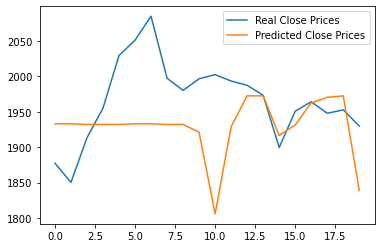

In [106]:
plt.plot(y_test.values[0:20], label = "Real Close Prices");
plt.plot(y_pred[0:20], label = "Predicted Close Prices");
plt.legend(); plt.show();